<a href="https://colab.research.google.com/github/Reyhaneh2001/DL_Course_ConvTasks/blob/main/Conv2D_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split

In [ ]:
# Load CIFAR10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Split into 85% train, 15% test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Normalize & One-Hot Encode
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
def build_model():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),  # Fixes the input_shape warning
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Exponential Decay LR (returns Python float)
def exponential_decay(epoch):
    initial_lr = 0.001
    decay_rate = 0.1
    return float(initial_lr * np.exp(-decay_rate * epoch))  # Convert to Python float

# OneCycle LR (returns Python float)
def onecycle_lr(epoch, max_lr=0.01, total_epochs=50):
    if epoch < total_epochs // 2:
        return float(max_lr * (epoch / (total_epochs // 2)))
    else:
        return float(max_lr * (1 - (epoch - total_epochs // 2) / (total_epochs // 2)))

In [ ]:
# Build models
exp_model = build_model()
onecycle_model = build_model()

# Compile with Adam optimizer
exp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
onecycle_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
exp_lr_callback = tf.keras.callbacks.LearningRateScheduler(exponential_decay)
onecycle_lr_callback = tf.keras.callbacks.LearningRateScheduler(onecycle_lr)

# Train Exponential Decay Model
print("Training with Exponential Decay LR...")
exp_history = exp_model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=25,
    validation_data=(x_val, y_val),
    callbacks=[exp_lr_callback]
)

# Train OneCycle Model
print("Training with OneCycle LR...")
onecycle_history = onecycle_model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=25,
    validation_data=(x_val, y_val),
    callbacks=[onecycle_lr_callback]
)

Training with Exponential Decay LR...
Epoch 1/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 392s 576ms/step - accuracy: 0.3450 - loss: 2.0709 - val_accuracy: 0.5993 - val_loss: 1.1369 - learning_rate: 0.0010
Epoch 2/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 444s 580ms/step - accuracy: 0.5829 - loss: 1.1662 - val_accuracy: 0.6663 - val_loss: 0.9377 - learning_rate: 9.0484e-04
Epoch 3/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 438s 574ms/step - accuracy: 0.6743 - loss: 0.9288 - val_accuracy: 0.7191 - val_loss: 0.8026 - learning_rate: 8.1873e-04
Epoch 4/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 386s 581ms/step - accuracy: 0.7109 - loss: 0.8261 - val_accuracy: 0.7201 - val_loss: 0.8030 - learning_rate: 7.4082e-04
Epoch 5/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 378s 569ms/step - accuracy: 0.7457 - loss: 0.7338 - val_accuracy: 0.7776 - val_loss: 0.6494 - learning_rate: 6.7032e-04
Epoch 6/25
665/665 ━━━━━━━━━━━━━━━━━━━━ 384s 572ms/step - accuracy: 0.7721 - loss: 0.6650 - val_accuracy: 0.7657 - val_loss: 0.6984 - learning_rate: 6.0653e-04
Epoch 

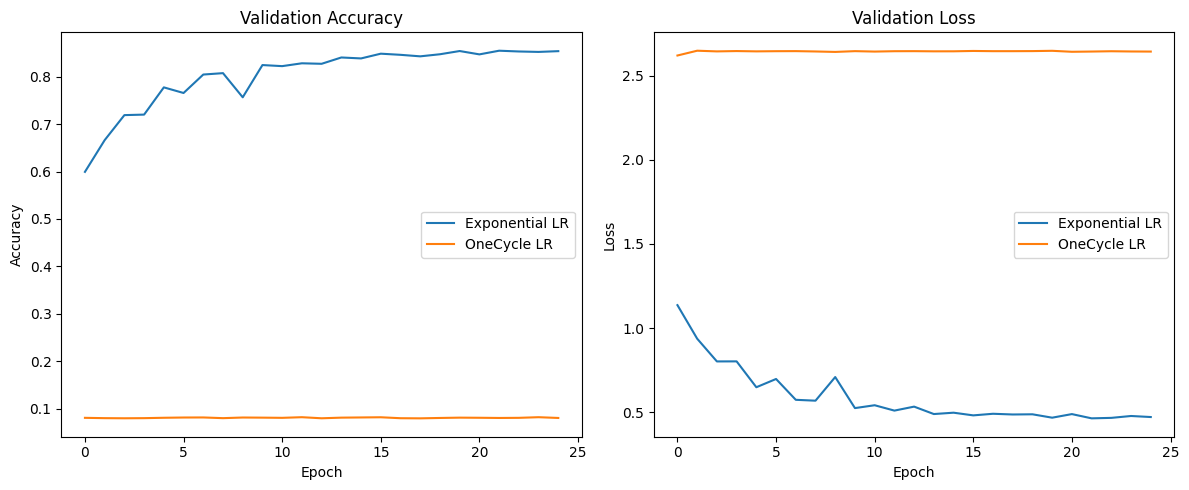

In [ ]:
# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(exp_history.history['val_accuracy'], label='Exponential LR')
plt.plot(onecycle_history.history['val_accuracy'], label='OneCycle LR')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(exp_history.history['val_loss'], label='Exponential LR')
plt.plot(onecycle_history.history['val_loss'], label='OneCycle LR')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()